In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

color_pallette = 'muted'
sns.set_theme(style='whitegrid', context='talk', palette=color_pallette, 
              rc={'font.family': 'serif', 'font.serif': 'Times New Roman', 'mathtext.fontset': 'dejavuserif'})


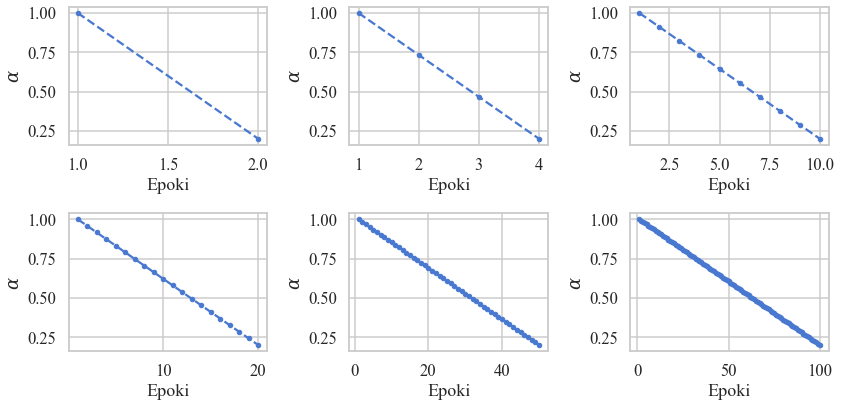

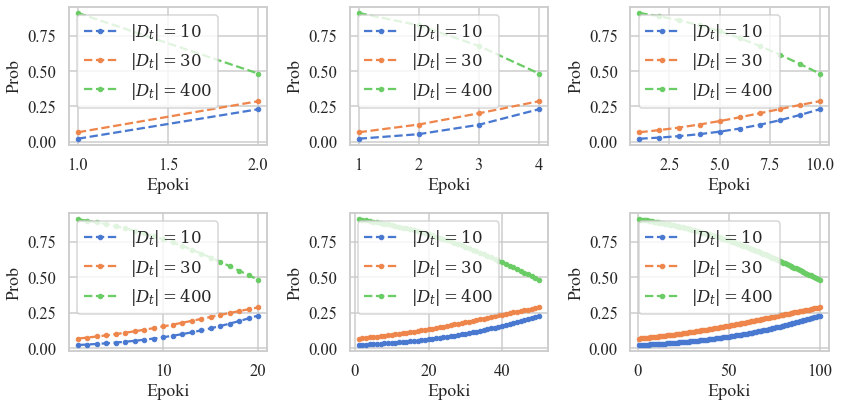

In [4]:
# Annealing sampling

E_list = [2, 4, 10, 20, 50, 100]

rows = 2
cols = math.ceil(len(E_list) / rows)

datasets = np.array([10, 30, 400])

fig, axis = plt.subplots(rows, cols, figsize=(12,6))
for E, ax in zip(E_list, axis.flatten()):
    epochs = np.arange(1, E+1)
    alpha = 1 - 0.8 * (epochs-1) / (E-1)
    
    ax.plot(epochs, alpha, '.--')
    ax.set_xlabel('Epoki')
    ax.set_ylabel(r'$\alpha$')
fig.tight_layout()    

fig, axis = plt.subplots(rows, cols, figsize=(12,6))
for E, ax in zip(E_list, axis.flatten()):
    epochs = np.arange(1, E+1)
    alpha_values =  1 - 0.8 * (epochs-1) / (E-1)
    
    total_d_list = []
    for alpha in alpha_values:
        total_d_list.append(sum(datasets** alpha))
        
    for d in datasets:
        prob = (d**alpha_values) / total_d_list
        ax.plot(epochs, prob, '.--', label=r'$|D_t|={}$'.format(d))

    ax.set_xlabel('Epoki')
    ax.set_ylabel(r'Prob')
    ax.legend()

fig.tight_layout()

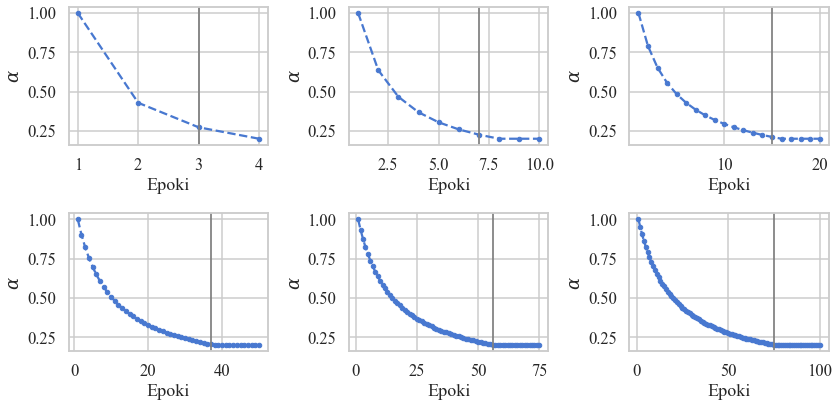

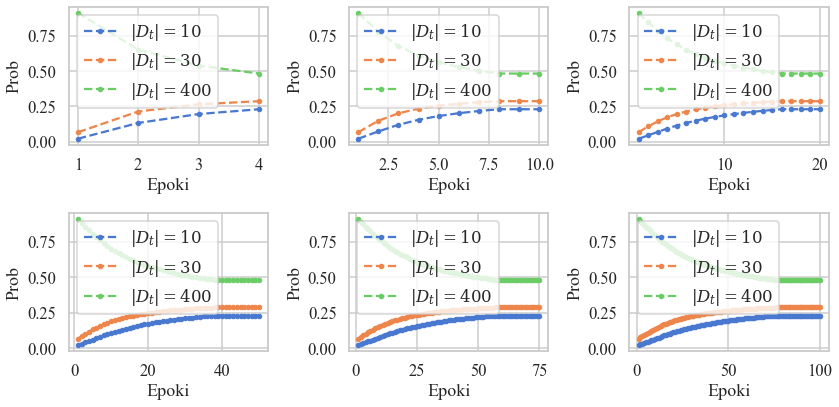

In [3]:
# Dynamic sampling

E_list = [4, 10, 20, 50, 75, 100]

rows = 2
cols = math.ceil(len(E_list) / rows)

T_max = 5
T_0 = 1


datasets = np.array([10, 30, 400])

fig, axis = plt.subplots(rows, cols, figsize=(12,6))

for E, ax in zip(E_list, axis.flatten()):
    epochs = np.arange(1, E+1)
    N = int(3/4 * E)
    temperatures = np.minimum(T_max, (epochs-1) * (T_max-T_0) / N + T_0)
    alpha = 1 / temperatures
    
    ax.plot(epochs, alpha, '.--')
    ax.axvline(N, lw=1.75, c='grey')
    ax.set_xlabel('Epoki')
    ax.set_ylabel(r'$\alpha$')
    
fig.tight_layout()    

fig, axis = plt.subplots(rows, cols, figsize=(12,6))
for E, ax in zip(E_list, axis.flatten()):
    epochs = np.arange(1, E+1)
    N = int(3/4 * E)
    
    temperatures = np.minimum(T_max, (epochs-1) * (T_max-T_0) / N + T_0)
    alpha_values = 1 / temperatures
    
    total_d_list = []
    for alpha in alpha_values:
        total_d_list.append(sum(datasets** alpha))
        
    for d in datasets:
        prob = (d**alpha_values) / total_d_list
        ax.plot(epochs, prob, '.--', label=r'$|D_t|={}$'.format(d))

    ax.set_xlabel('Epoki')
    ax.set_ylabel(r'Prob')
    ax.legend()

fig.tight_layout()

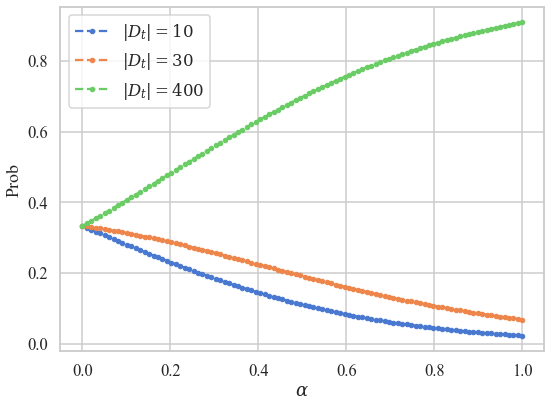

In [2]:
datasets = np.array([10, 30, 400])

alpha_values = np.linspace(0, 1, 100)

total_d_list = []
for alpha in alpha_values:
    total_d_list.append(sum(datasets**alpha))

fig, ax = plt.subplots(figsize=(8,6))
for d in datasets:
    prob = (d**alpha_values) / total_d_list
    ax.plot(alpha_values, prob, '.--', label=r'$|D_t|={}$'.format(d))

ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'Prob')
ax.legend()
fig.tight_layout()


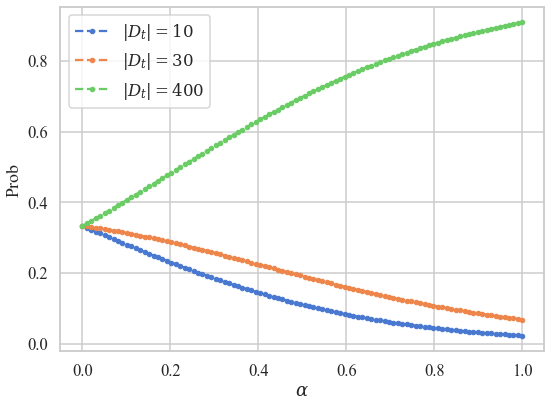

In [5]:
datasets = np.array([10, 30, 400])
total_d = sum(datasets)
d_probs = [d / total_d for d in datasets]

alpha_values = np.linspace(0, 1, 100)
scaled_d_probs = [p**alpha_values for p in d_probs]
sum_scaled_probs = sum(scaled_d_probs)
# probs**alpha_values

fig, ax = plt.subplots(figsize=(8,6))
for scaled_d_prob, d in zip(scaled_d_probs, datasets):
    prob = scaled_d_prob / sum_scaled_probs
    ax.plot(alpha_values, prob, '.--', label=r'$|D_t|={}$'.format(d))

ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'Prob')
ax.legend()
fig.tight_layout()


In [38]:
datasets[-1::-1]

array([9999, 9998, 9997, ..., 1002, 1001, 1000])

In [52]:
len(datasets)

90

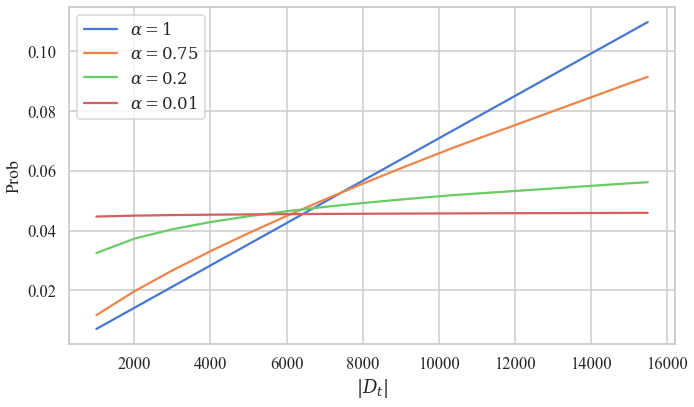

In [57]:
datasets = np.sort(np.concatenate([np.arange(1000, 10000, 1000), np.arange(1000, 10000, 1000) + 10,
                      np.arange(10000, 20000, 5000), np.arange(10000, 20000, 5000) + 500]))

total_d = sum(datasets)
d_probs = np.array([d / total_d for d in datasets])

alpha_values = [1, 0.75, 1/5, 1/100]
scaled_d_probs = [d_probs**alpha_val for alpha_val in alpha_values]
scaled_d_probs = [scaled_d_prob / sum(scaled_d_prob) for scaled_d_prob in scaled_d_probs]

fig, ax = plt.subplots(figsize=(10,6))
for scaled_d_prob, alpha_val in zip(scaled_d_probs, alpha_values):
    ax.plot(datasets[-1::-1], scaled_d_prob[-1::-1], '-', label=r'$\alpha={}$'.format(alpha_val))

ax.set_xlabel(r'$|D_t|$')
ax.set_ylabel(r'Prob')
ax.legend()
# ax.set_xscale('log')
fig.tight_layout()